<a href="https://colab.research.google.com/github/samridhi20-hub/Deep-Learning_a1901641/blob/main/Samridhi_Gupta_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# All Imports
import tarfile
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Add, Input, DepthwiseConv2D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNet
from collections import Counter

In [11]:
# Set file paths
file_path = '/content/cifar-10-python.tar.gz'  # Path in Colab
extract_path = '/content/cifar-10-python'

# Extract the dataset
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

# Define a function to load each batch
def load_batch(file):
    with open(file, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
        X = data_dict[b'data']
        y = data_dict[b'labels']
        X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        y = np.array(y)
    return X, y

# Load training data
train_data, train_labels = [], []
for i in range(1, 6):
    X, y = load_batch(f"{extract_path}/cifar-10-batches-py/data_batch_{i}")
    train_data.append(X)
    train_labels.append(y)

train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# Load test data
test_data, test_labels = load_batch(f"{extract_path}/cifar-10-batches-py/test_batch")

# Split training data into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42
)

# Print the shapes of datasets
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (40000, 32, 32, 3)
Train labels shape: (40000,)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [12]:
# Normalize pixel values
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=10)
val_labels = to_categorical(val_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(val_data, val_labels)
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2545 - loss: 1.9910 - val_accuracy: 0.4982 - val_loss: 1.3924
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4690 - loss: 1.4563 - val_accuracy: 0.5620 - val_loss: 1.2217
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5516 - loss: 1.2703 - val_accuracy: 0.6192 - val_loss: 1.0711
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5928 - loss: 1.1513 - val_accuracy: 0.6289 - val_loss: 1.0312
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6258 - loss: 1.0687 - val_accuracy: 0.6643 - val_loss: 0.9590
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6517 - loss: 0.9950 - val_accuracy: 0.6774 - val_loss: 0.9224
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6692 - loss: 0.9455 - val_accuracy: 0.6702 - val_loss: 0.9371
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6911 - loss: 0.8818 -

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7133 - loss: 0.9989
Test Accuracy: 71.08%


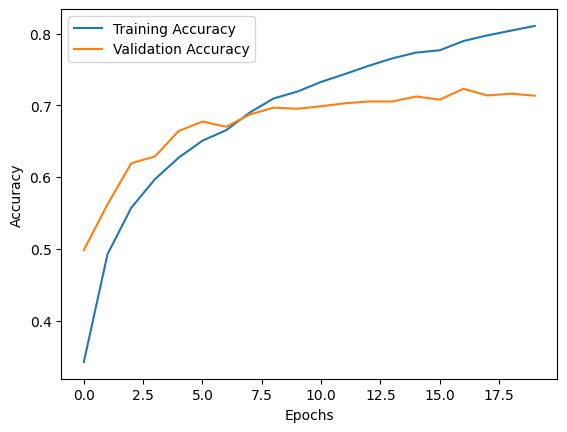

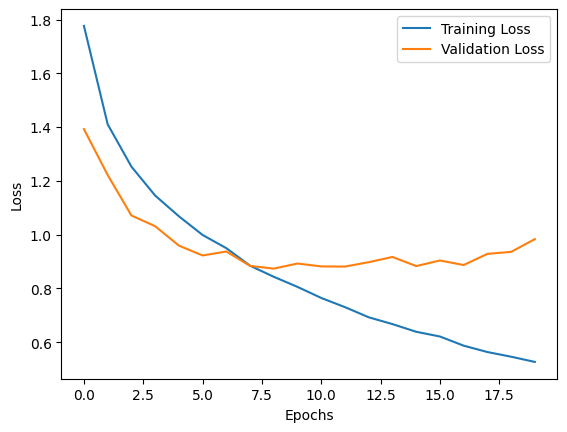

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Modified architecture with more filters and an additional layer
# regularization and Batch normalization
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# FINE TUNING
# 1. Optimizing hyperparameters
# Reduce learning rate when a metric has stopped improving
# using Use a learning rate scheduler to gradually decrease the learning rate during training,
# helping the model converge smoothly.
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_data, train_labels,
    epochs=30,
    batch_size=32,
    validation_data=(val_data, val_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3675 - loss: 2.6006 - val_accuracy: 0.5399 - val_loss: 1.6780 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5687 - loss: 1.6273 - val_accuracy: 0.5873 - val_loss: 1.5996 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6301 - loss: 1.4767 - val_accuracy: 0.5352 - val_loss: 1.7802 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6603 - loss: 1.4290 - val_accuracy: 0.6757 - val_loss: 1.4242 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6869 - loss: 1.3924 - val_accuracy: 0.6150 - val_loss: 1.6144 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7025 - loss: 1.3639 - val_accuracy: 0.6626 - val_loss: 1.4780 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7135 -

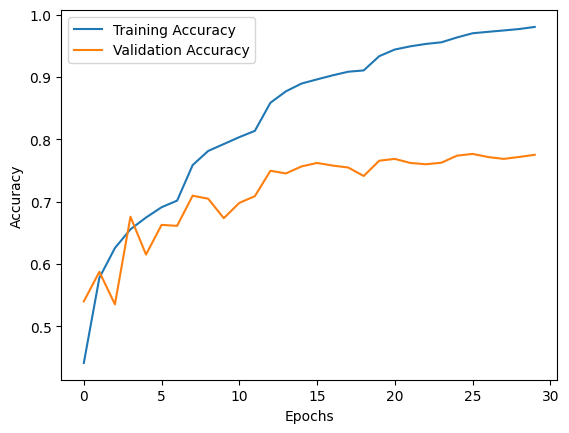

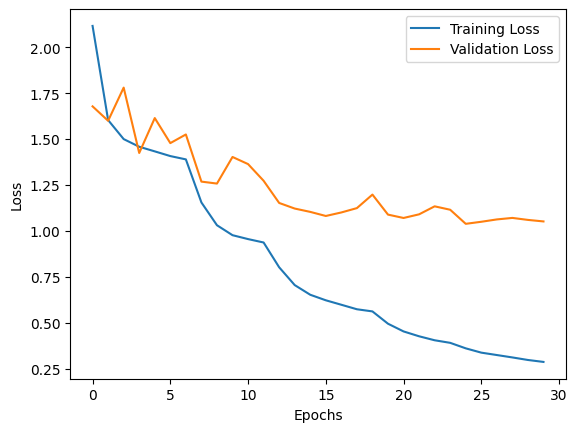

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 1.0182
Test Accuracy: 77.75%


In [ ]:
# Residual block for ResNet-18
def resnet_block(input_tensor, filters, downsample=False):
    stride = 2 if downsample else 1
    x = Conv2D(filters, 3, strides=stride, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    if downsample:
        input_tensor = Conv2D(filters, 1, strides=2, padding="same")(input_tensor)

    x = Add()([x, input_tensor])
    x = ReLU()(x)
    return x

# ResNet-18 Model Definition
def build_resnet_18(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, downsample=True)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, downsample=True)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, downsample=True)
    x = resnet_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Create and compile the ResNet-18 model
resnet_18_model = build_resnet_18((32, 32, 3), 10)  # For CIFAR-10 with 10 classes
resnet_18_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_resnet_18 = resnet_18_model.fit(train_data, train_labels,
                                        epochs=20, batch_size=64,
                                        validation_data=(val_data, val_labels))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3976 - loss: 1.7941 - val_accuracy: 0.4806 - val_loss: 1.4984
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.6014 - loss: 1.1146 - val_accuracy: 0.4016 - val_loss: 2.1287
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6799 - loss: 0.9043 - val_accuracy: 0.6071 - val_loss: 1.2019
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7301 - loss: 0.7719 - val_accuracy: 0.5671 - val_loss: 1.3430
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7685 - loss: 0.6611 - val_accuracy: 0.6685 - val_loss: 0.9984
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8066 - loss: 0.5579 - val_accuracy: 0.7046 - val_loss: 0.9273
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8367 - loss: 0.4672 - val_accuracy: 0.6887 - val_loss: 0.9811
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8663 - loss: 0.3905 - v

In [ ]:
test_loss, test_accuracy = resnet_18_model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7148 - loss: 1.4162
Test Accuracy: 71.61%


In [ ]:
# AlexNet Model Definition (Modified for CIFAR-10)
alexnet_model = Sequential([
    Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),  # Reduced kernel size and stride
    MaxPooling2D((2, 2), strides=2),  # Adjusted pooling
    Conv2D(256, (5, 5), padding="same", activation='relu'),
    MaxPooling2D((2, 2), strides=2), # Adjusted pooling
    Conv2D(384, (3, 3), padding="same", activation='relu'),
    Conv2D(384, (3, 3), padding="same", activation='relu'),
    Conv2D(256, (3, 3), padding="same", activation='relu'),
    MaxPooling2D((2, 2), strides=2), # Adjusted pooling
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_alexnet = alexnet_model.fit(train_data, train_labels,
                                    epochs=20, batch_size=64,
                                    validation_data=(val_data, val_labels))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.2343 - loss: 2.0338 - val_accuracy: 0.5038 - val_loss: 1.3461
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.5203 - loss: 1.3262 - val_accuracy: 0.5827 - val_loss: 1.1683
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.5981 - loss: 1.1251 - val_accuracy: 0.6477 - val_loss: 0.9897
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.6528 - loss: 0.9837 - val_accuracy: 0.6660 - val_loss: 0.9484
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6929 - loss: 0.8802 - val_accuracy: 0.6842 - val_loss: 0.9024
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7239 - loss: 0.7820 - val_accuracy: 0.7044 - val_loss: 0.8609
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7487 - loss: 0.7072 - val_accuracy: 0.6932 - val_loss: 0.8916
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7686 - loss: 0.6565 - 

In [ ]:
test_loss, test_accuracy = alexnet_model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7161 - loss: 1.1154
Test Accuracy: 71.36%


In [ ]:
# Define a function for depthwise separable convolution
def depthwise_separable_conv(x, pointwise_filters, strides=(1, 1)):
    x = DepthwiseConv2D(kernel_size=(3, 3), strides=strides, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# Build MobileNet architecture
def build_mobilenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), strides=(2, 2), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Define MobileNet blocks
    x = depthwise_separable_conv(x, 64)
    x = depthwise_separable_conv(x, 128, strides=(2, 2))
    x = depthwise_separable_conv(x, 128)
    x = depthwise_separable_conv(x, 256, strides=(2, 2))
    x = depthwise_separable_conv(x, 256)
    x = depthwise_separable_conv(x, 512, strides=(2, 2))

    # Add six 512-channel depthwise separable convolutions
    for _ in range(5):
        x = depthwise_separable_conv(x, 512)

    x = depthwise_separable_conv(x, 1024, strides=(2, 2))
    x = depthwise_separable_conv(x, 1024)

    # Final layers
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Create and compile the MobileNet model from scratch
mobilenet_scratch_model = build_mobilenet((32, 32, 3), 10)  # Assuming CIFAR-10 (10 classes)
mobilenet_scratch_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_mobilenet_scratch = mobilenet_scratch_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=64,
    validation_data=(val_data, val_labels)
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.2249 - loss: 2.1594 - val_accuracy: 0.1328 - val_loss: 2.2892
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4065 - loss: 1.6179 - val_accuracy: 0.4268 - val_loss: 1.6412
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4794 - loss: 1.4323 - val_accuracy: 0.4553 - val_loss: 1.5372
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5210 - loss: 1.3498 - val_accuracy: 0.5214 - val_loss: 1.3815
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5636 - loss: 1.2275 - val_accuracy: 0.5227 - val_loss: 1.4194
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5999 - loss: 1.1350 - val_accuracy: 0.5472 - val_loss: 1.3012
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6285 - loss: 1.0649 - val_accuracy: 0.5531 - val_loss: 1.4125
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6487 - loss: 1.0058 - val_a

In [ ]:
mobilenet_scratch_test_loss, mobilenet_scratch_test_accuracy = mobilenet_scratch_model.evaluate(test_data, test_labels)
print(f"MobileNet (from scratch) Test Accuracy: {mobilenet_scratch_test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6818 - loss: 1.0932
MobileNet (from scratch) Test Accuracy: 68.31%


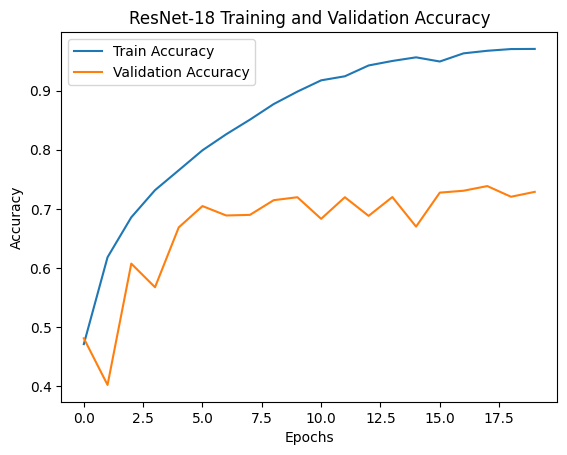

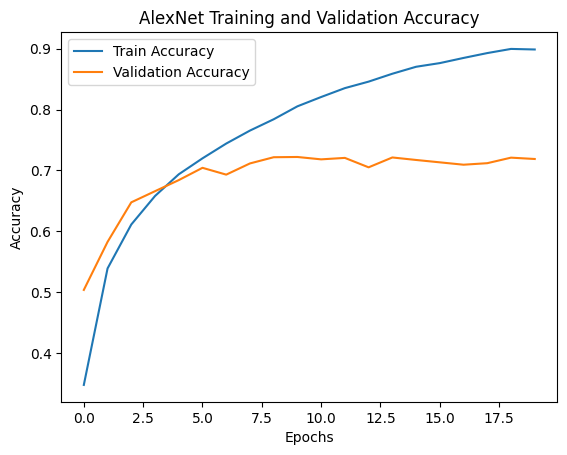

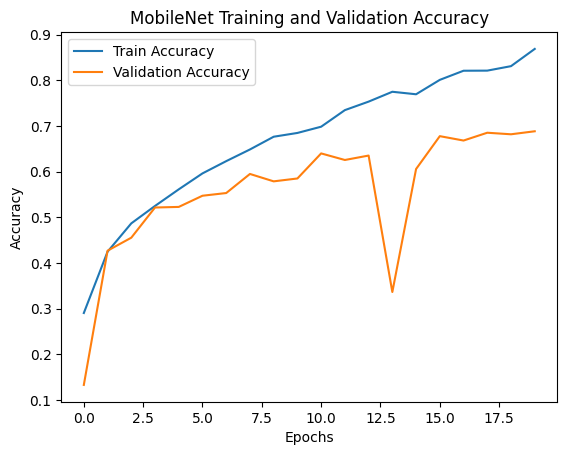

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for ResNet-18, AlexNet, and MobileNet
def plot_accuracy(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_resnet_18, 'ResNet-18')
plot_accuracy(history_alexnet, 'AlexNet')
plot_accuracy(history_mobilenet_scratch, 'MobileNet')

In [ ]:
def build_resnet_18(hp):
    # Hyperparameters to tune
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
    num_filters = hp.Choice('num_filters', [64, 128])

    def resnet_block(input_tensor, filters, downsample=False):
        stride = 2 if downsample else 1
        x = Conv2D(filters, 3, strides=stride, padding="same", kernel_regularizer=l2(0.001))(input_tensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, 3, padding="same", kernel_regularizer=l2(0.001))(x)
        x = BatchNormalization()(x)
        if downsample:
            input_tensor = Conv2D(filters, 1, strides=2, padding="same")(input_tensor)
        x = Add()([x, input_tensor])
        x = ReLU()(x)
        return x

    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(num_filters, 7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding="same")(x)

    # Add ResNet blocks with `num_filters` and batch normalization
    x = resnet_block(x, num_filters)
    x = resnet_block(x, num_filters)
    x = resnet_block(x, num_filters * 2, downsample=True)
    x = resnet_block(x, num_filters * 2)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation="softmax")(x)  # Assuming CIFAR-10 with 10 classes

    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
def build_alexnet(hp):
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
    dropout_rate = hp.Choice('dropout_rate', [0.3, 0.5, 0.7])

    model = Sequential([
        Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'), # Reduced kernel size, added padding
        MaxPooling2D((2, 2), strides=2), # Reduced strides
        Conv2D(256, (5, 5), strides=1, activation='relu', padding='same'), # Reduced kernel size, added padding
        MaxPooling2D((2, 2), strides=2), # Reduced strides
        Conv2D(384, (3, 3), strides=1, activation='relu', padding='same'), # Reduced kernel size, added padding
        Conv2D(384, (3, 3), strides=1, activation='relu', padding='same'), # Reduced kernel size, added padding
        Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'), # Reduced kernel size, added padding
        MaxPooling2D((2, 2), strides=2), # Reduced strides
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(dropout_rate),
        Dense(4096, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [20]:
def build_mobilenet(hp):
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
    dropout_rate = hp.Choice('dropout_rate', [0.2, 0.4, 0.6])

    base_model = MobileNet(input_shape=(32, 32, 3), alpha=hp.Choice('alpha', [0.25, 0.5, 0.75]), include_top=False)
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [14]:
!pip install -q keras-tuner

In [ ]:
from kerastuner import RandomSearch
# Define tuner and search space
tuner_resnet = RandomSearch(
    build_resnet_18,
    objective='val_accuracy',
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='ResNet18_tuning'
)

# Execute the search for the best hyperparameters
tuner_resnet.search(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# To get the best model and hyperparameters after tuning
best_resnet_model = tuner_resnet.get_best_models(num_models=1)[0]
best_resnet_hyperparams = tuner_resnet.get_best_hyperparameters(1)[0]
print("Best ResNet Hyperparameters:", best_resnet_hyperparams.values)


Trial 5 Complete [00h 01m 41s]
val_accuracy: 0.6633999943733215

Best val_accuracy So Far: 0.7145000100135803
Total elapsed time: 00h 10m 54s
Best ResNet Hyperparameters: {'learning_rate': 0.0001, 'num_filters': 128}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 82 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate ResNet with best hyperparameters
resnet_test_loss, resnet_test_accuracy = best_resnet_model.evaluate(test_data, test_labels)
print(f"Tuned ResNet Test Accuracy: {resnet_test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7198 - loss: 1.6675
Tuned ResNet Test Accuracy: 71.38%


In [15]:
from kerastuner import RandomSearch

# Define a RandomSearch tuner for AlexNet
tuner_alexnet = RandomSearch(
    build_alexnet,  # Pass in the AlexNet function we defined earlier
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='AlexNet_tuning'
)

# Run the tuning process for AlexNet
tuner_alexnet.search(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Trial 5 Complete [00h 09m 01s]
val_accuracy: 0.6583999991416931

Best val_accuracy So Far: 0.795199990272522
Total elapsed time: 00h 35m 38s


In [16]:
# Retrieve the best AlexNet model
best_alexnet_model = tuner_alexnet.get_best_models(num_models=1)[0]
best_alexnet_hyperparams = tuner_alexnet.get_best_hyperparameters(1)[0]
print("Best AlexNet Hyperparameters:", best_alexnet_hyperparams.values)

Best AlexNet Hyperparameters: {'learning_rate': 0.0001, 'dropout_rate': 0.7}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
# Evaluate ResNet with best hyperparameters
alexnet_test_loss, alexnet_test_accuracy = best_alexnet_model.evaluate(test_data, test_labels)
print(f"Tuned ResNet Test Accuracy: {alexnet_test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7866 - loss: 0.6903
Tuned ResNet Test Accuracy: 78.50%


In [21]:
# Define a RandomSearch tuner for MobileNet
tuner_mobilenet = RandomSearch(
    build_mobilenet,  # Pass in the MobileNet function we defined earlier
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='MobileNet_tuning'
)

# Run the tuning process for MobileNet
tuner_mobilenet.search(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Trial 5 Complete [00h 03m 05s]
val_accuracy: 0.5081999897956848

Best val_accuracy So Far: 0.7706000208854675
Total elapsed time: 00h 16m 05s


In [22]:
# Retrieve and evaluate the best MobileNet model
best_mobilenet_model = tuner_mobilenet.get_best_models(num_models=1)[0]
mobilenet_test_loss, mobilenet_test_accuracy = best_mobilenet_model.evaluate(test_data, test_labels)
print(f"Tuned MobileNet Test Accuracy: {mobilenet_test_accuracy * 100:.2f}%")
print(f"Tuned MobileNet Test Loss: {mobilenet_test_loss:.4f}")

<ipython-input-20-88fe0d85394d>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(input_shape=(32, 32, 3), alpha=hp.Choice('alpha', [0.25, 0.5, 0.75]), include_top=False)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 172 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7761 - loss: 0.6753
Tuned MobileNet Test Accuracy: 77.39%
Tuned MobileNet Test Loss: 0.6784


In [23]:
# Evaluate MobileNet with best hyperparameters on test data
mobilenet_test_loss, mobilenet_test_accuracy = best_mobilenet_model.evaluate(test_data, test_labels)
print(f"Tuned MobileNet Test Accuracy: {mobilenet_test_accuracy * 100:.2f}%")
print(f"Tuned MobileNet Test Loss: {mobilenet_test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7761 - loss: 0.6753
Tuned MobileNet Test Accuracy: 77.39%
Tuned MobileNet Test Loss: 0.6784
